In [7]:
import os
import re
import matplotlib.pyplot as plt

## EDX coordinates

Load .txt file with SE image details into an image_dict. 

May be useful if you again copy image info

In [4]:
file_path = r"Z:\P110143-phosphosulfides-Andrea\Data\Samples\anait_0004_Ba\EDX\anait_0004_BL\coordinates.txt"
# Initialize a dictionary to store the data
image_dict = {}

# Regular expressions to capture the relevant lines
image_pattern = re.compile(r'Label:\s*Electron Image (\d+)')
stage_x_pattern = re.compile(r'Stage X:\s*([-+]?[0-9]*\.?[0-9]+)mm')
stage_y_pattern = re.compile(r'Stage Y:\s*([-+]?[0-9]*\.?[0-9]+)mm')

# Variables to temporarily store the current image and its coordinates
current_image = None
x_coordinate = None
y_coordinate = None

# Read the file and extract the data
with open(file_path, 'r') as file:
    for line in file:
        # Find image number
        image_match = image_pattern.search(line)
        if image_match:
            # If we have a previous image and its coordinates, store them in the dictionary
            if current_image is not None and x_coordinate is not None and y_coordinate is not None:
                image_dict[current_image] = [x_coordinate, y_coordinate]

            # Start a new image
            current_image = int(image_match.group(1))
            x_coordinate = None
            y_coordinate = None

        # Find Stage X
        stage_x_match = stage_x_pattern.search(line)
        if stage_x_match:
            x_coordinate = float(stage_x_match.group(1))

        # Find Stage Y
        stage_y_match = stage_y_pattern.search(line)
        if stage_y_match:
            y_coordinate = float(stage_y_match.group(1))

    # Store the last image and its coordinates after exiting the loop
    if current_image is not None and x_coordinate is not None and y_coordinate is not None:
        image_dict[current_image] = [x_coordinate, y_coordinate]

# Show the dictionary
print(image_dict)


{1: [-14.587, -15.856], 2: [-14.545, -9.252], 6: [-14.381, 17.161], 7: [-4.982, -15.916], 8: [-4.94, -9.312], 19: [14.228, -16.036], 24: [14.434, 16.982]}


In [11]:
# save info from images 1-2-7
ncolumns = 4
nrows = 6
mag= 30000

#accurate "grid vectors"
a = [image_dict[7][0] - image_dict[1][0], image_dict[7][1] - image_dict[1][1]]
b = [image_dict[2][0] - image_dict[1][0], image_dict[2][1] - image_dict[1][1]]

# grid vectors from first corner
space_x = image_dict[7][0] - image_dict[1][0]
space_y = image_dict[2][1] - image_dict[1][1]

#grid vectors from furthest points
spacing_x = (image_dict[19][0] - image_dict[1][0])/(ncolumns-1)
spacing_y = (image_dict[6][1] - image_dict[1][1])/(nrows-1)

#grid vector from point 24, making a square
size_x = image_dict[24][0] - image_dict[1][0]
size_y = image_dict[24][1] - image_dict[1][1]
spacex_div = size_x/(ncolumns-1)
spacey_div = size_y/(nrows-1)

startx= image_dict[1][0]
starty= image_dict[1][1]

area_x = 13.7*30/mag
area_y = 9.4*30/mag

x,y=[],[]
for key in image_dict:
    x.append(image_dict[key][0])
    y.append(image_dict[key][1])



Text(0, 0.5, 'Y coordinate (mm)')

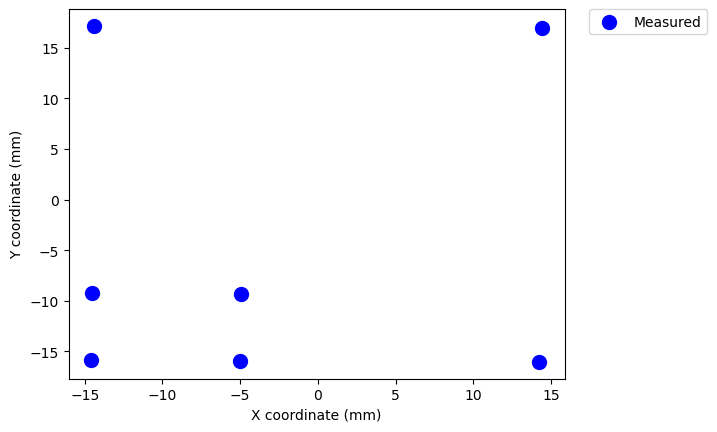

In [10]:
#plt.scatter(X_1619, Y_1619, color='green', label="Calculated from furthest points", s=100)
plt.scatter(x, y, color='blue', label="Measured", s=100)
# plt.scatter(X_127, Y_127, color='red', marker='*', label="Calculated from images 1-2-7", s=100) # as in EDX_stage_coords
#plt.scatter(X_24, Y_24, color='pink', marker='x', label="Calculated from image 24", s=50)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("X coordinate (mm)")
plt.ylabel("Y coordinate (mm)")

### XRD integrate with edx

In [ ]:
def add_info2(data, info_dict):
    """Function to add information to a dataset for each point."""
    info_type = list(info_dict.keys())[0]
    headerlength = len(data.columns.get_level_values(1).unique())
    coords= data.columns.get_level_values(0).unique()
    k=0
    new_data = data.copy()
    for i in range(0, len(coords)):
        #print(coords[i])
        new_df = pd.DataFrame([info_dict[info_type][i]], columns =[(coords[i], info_type)])
            
        new_data.insert(headerlength*(i+1)+k, "{}".format(data.columns.get_level_values(0).unique()[i]), new_df, allow_duplicates=True)
        new_data.rename(columns={'':  f'{info_type}'}, inplace = True)

        k=k+len(new_df.columns)
                
    new_frame = new_data.copy()

    return new_frame

In [ ]:

sample_23= 'mittma_0023_BL_2D_phases_coords'
with open(os.path.join(XRD_pickles_path, sample_23+".pkl"), "rb") as openfile:
    data_23_BL = pickle.load(openfile)

# data_23_BL.drop(columns= '2θ (°)', level=1, inplace=True)
# data_23_BL.drop(columns= 'Intensity, cps', level=1, inplace=True)
# data_23_BL.drop(columns= 'Background', level=1, inplace=True)
# data_23_BL.drop(columns= 'Corrected Intensity', level=1, inplace=True)

dict_to_add = {'sample': ['23_BL']*len(data_23_BL.columns.get_level_values(0).unique())}
# print(dict_to_add)
# print(len(dict_to_add['sample']))
# print(len(data_23_BL.columns.get_level_values(0).unique()))

# AAA = add_info(data_23_BL, dict_to_add)
# dat_23_BL = add_info2(data_23_BL, {'Sample': [23]*len(data_23_BL.columns.levels[0].unique())})



sample_22= 'mittma_0022_FRnew_phases_coords'
with open(os.path.join(XRD_pickles_path, sample_22+".pkl"), "rb") as openfile:
    data_22_FR = pickle.load(openfile)

# data_22_FR.drop(columns= '2θ (°)', level=1, inplace=True)
# data_22_FR.drop(columns= 'Intensity, cps', level=1, inplace=True)
# data_22_FR.drop(columns= 'Background', level=1, inplace=True)
# data_22_FR.drop(columns= 'Corrected Intensity', level=1, inplace=True)

# dict_to_add_2 = {'sample': ['22_FR']*len(data_22_FR.columns.levels[0].unique())}
# print(dict_to_add_2)
# data_22_FR= add_info(data_22_FR, dict_to_add_2)

all_B = combine_data([data_combined, data_22_FR, data_23_BL])

display(all_B)